In [1]:
import time
import pickle
import myPlot
import my_neuron as neuron
from matplotlib import pyplot as plt
import importlib
from IPython.display import clear_output
import numpy as np
import utils

In [ ]:
approx_total_time = 600 #min
name="axonal+VGCC"
root = "risultati/"+name

importlib.reload(myPlot)
importlib.reload(neuron)
axes = None
temp = 0
n_plots = 1

for i in range(approx_total_time):
    time.sleep(600)
    f1 = open(root+"parameters", "rb")
    parameters: neuron.SimulationParameters = pickle.load(f1)
    if (temp == parameters.N_iterations):
        continue
    temp = parameters.N_iterations
    f2 = open(root+"properties", "rb")
    properties: neuron.Properties = pickle.load(f2)
    f3 = open(root+"values", "rb")
    values = pickle.load(f3)
    print("Numero di iterazioni: %d"%parameters.N_iterations)
    axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, n_drawings=len(values.track_variables) ,n_plots=n_plots)
    print(str(properties) + "\n" + str(parameters))
    clear_output(wait=True)

In [ ]:
importlib.reload(utils)
f1 = open("risultati/28_04/two_noise_completa_nmax=10values", "rb")
f2 = open("risultati/28_04/no_noise_completa_nmax=10values", "rb")
t_axis = np.arange(0, 40, 0.02e-3)
#al_noise = utils.getReleasesXSecfromN_v(pickle.load(f1).N_v.value[50000:], 0.02e-3, [100000, 400000])
prob = pickle.load(f1).release_prob_a_posteriori.value
prob_no_noise = pickle.load(f2).release_prob_a_posteriori.value
#val_no_noise = utils.getReleasesXSecfromN_v(pickle.load(f2).N_v.value[50000:], 0.02e-3, [100000, 400000])
#val_noise_approx = val_noise#utils.blur(val_noise, [100000, 200000, 400000, 800000])
#val_no_noise_approx = val_no_noise#utils.blur(val_no_noise, [100000, 200000, 400000, 800000])
fig, ax = plt.subplots(dpi=200)
#plt.plot(t_axis, val_no_noise_approx, "-o", label="No noise", markevery=200000)
#plt.show()
#plt.plot(t_axis, val_noise_approx, "->k", label="All noises", markevery=200000)
#plt.legend()
#ax.set_xlabel("time (s)")
#ax.set_ylabel("average release probability")
#print(np.mean(val_no_noise), np.mean(val_noise))
plt.plot(t_axis, prob)
plt.plot(t_axis, prob_no_noise)

In [ ]:
importlib.reload(neuron)
importlib.reload(myPlot)
time_window_plot = 15, 15.005
# get last figure
f1 = open("parameters", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
f2 = open("properties", "rb")
properties: neuron.Properties = pickle.load(f2)
f3 = open("values", "rb")
values = pickle.load(f3)
print("Numero di iterazioni: %d"%parameters.N_iterations)
axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, time_window=time_window_plot, n_drawings=len(values.track_variables))
print(str(properties) + "\n" + str(parameters))

In [ ]:
# Select a saved plot to show
importlib.reload(myPlot)
importlib.reload(neuron)
time_window = 16,20
file_name = "risultati/"
file_name += "22_02_f(λ)_"
f1 = open(file_name+"params", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
f2 = open(file_name+"properties", "rb")
properties: neuron.Properties = pickle.load(f2)
f3 = open(file_name+"my", "rb")
values = pickle.load(f3)
print("Numero di iterazioni: %d"%parameters.N_iterations)
axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, time_window=time_window, labels=labels, n_drawings=len(values.track_variables), n_plots=3, dpixel=400)
print(str(properties) + "\n" + str(parameters))

In [ ]:
# Select a saved plot to show
importlib.reload(myPlot)
importlib.reload(neuron)
time_window = 0,40
file_name = "risultati/28_04/no_noise_completa_nmax=27"
f1 = open(file_name+"parameters", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
f2 = open(file_name+"properties", "rb")
properties: neuron.Properties = pickle.load(f2)
f3 = open(file_name+"values", "rb")
values = pickle.load(f3)
print("Numero di iterazioni: %d"%parameters.N_iterations)
axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, time_window=time_window, n_drawings=len(values.track_variables), dpixel=200)
print(str(properties) + "\n" + str(parameters))


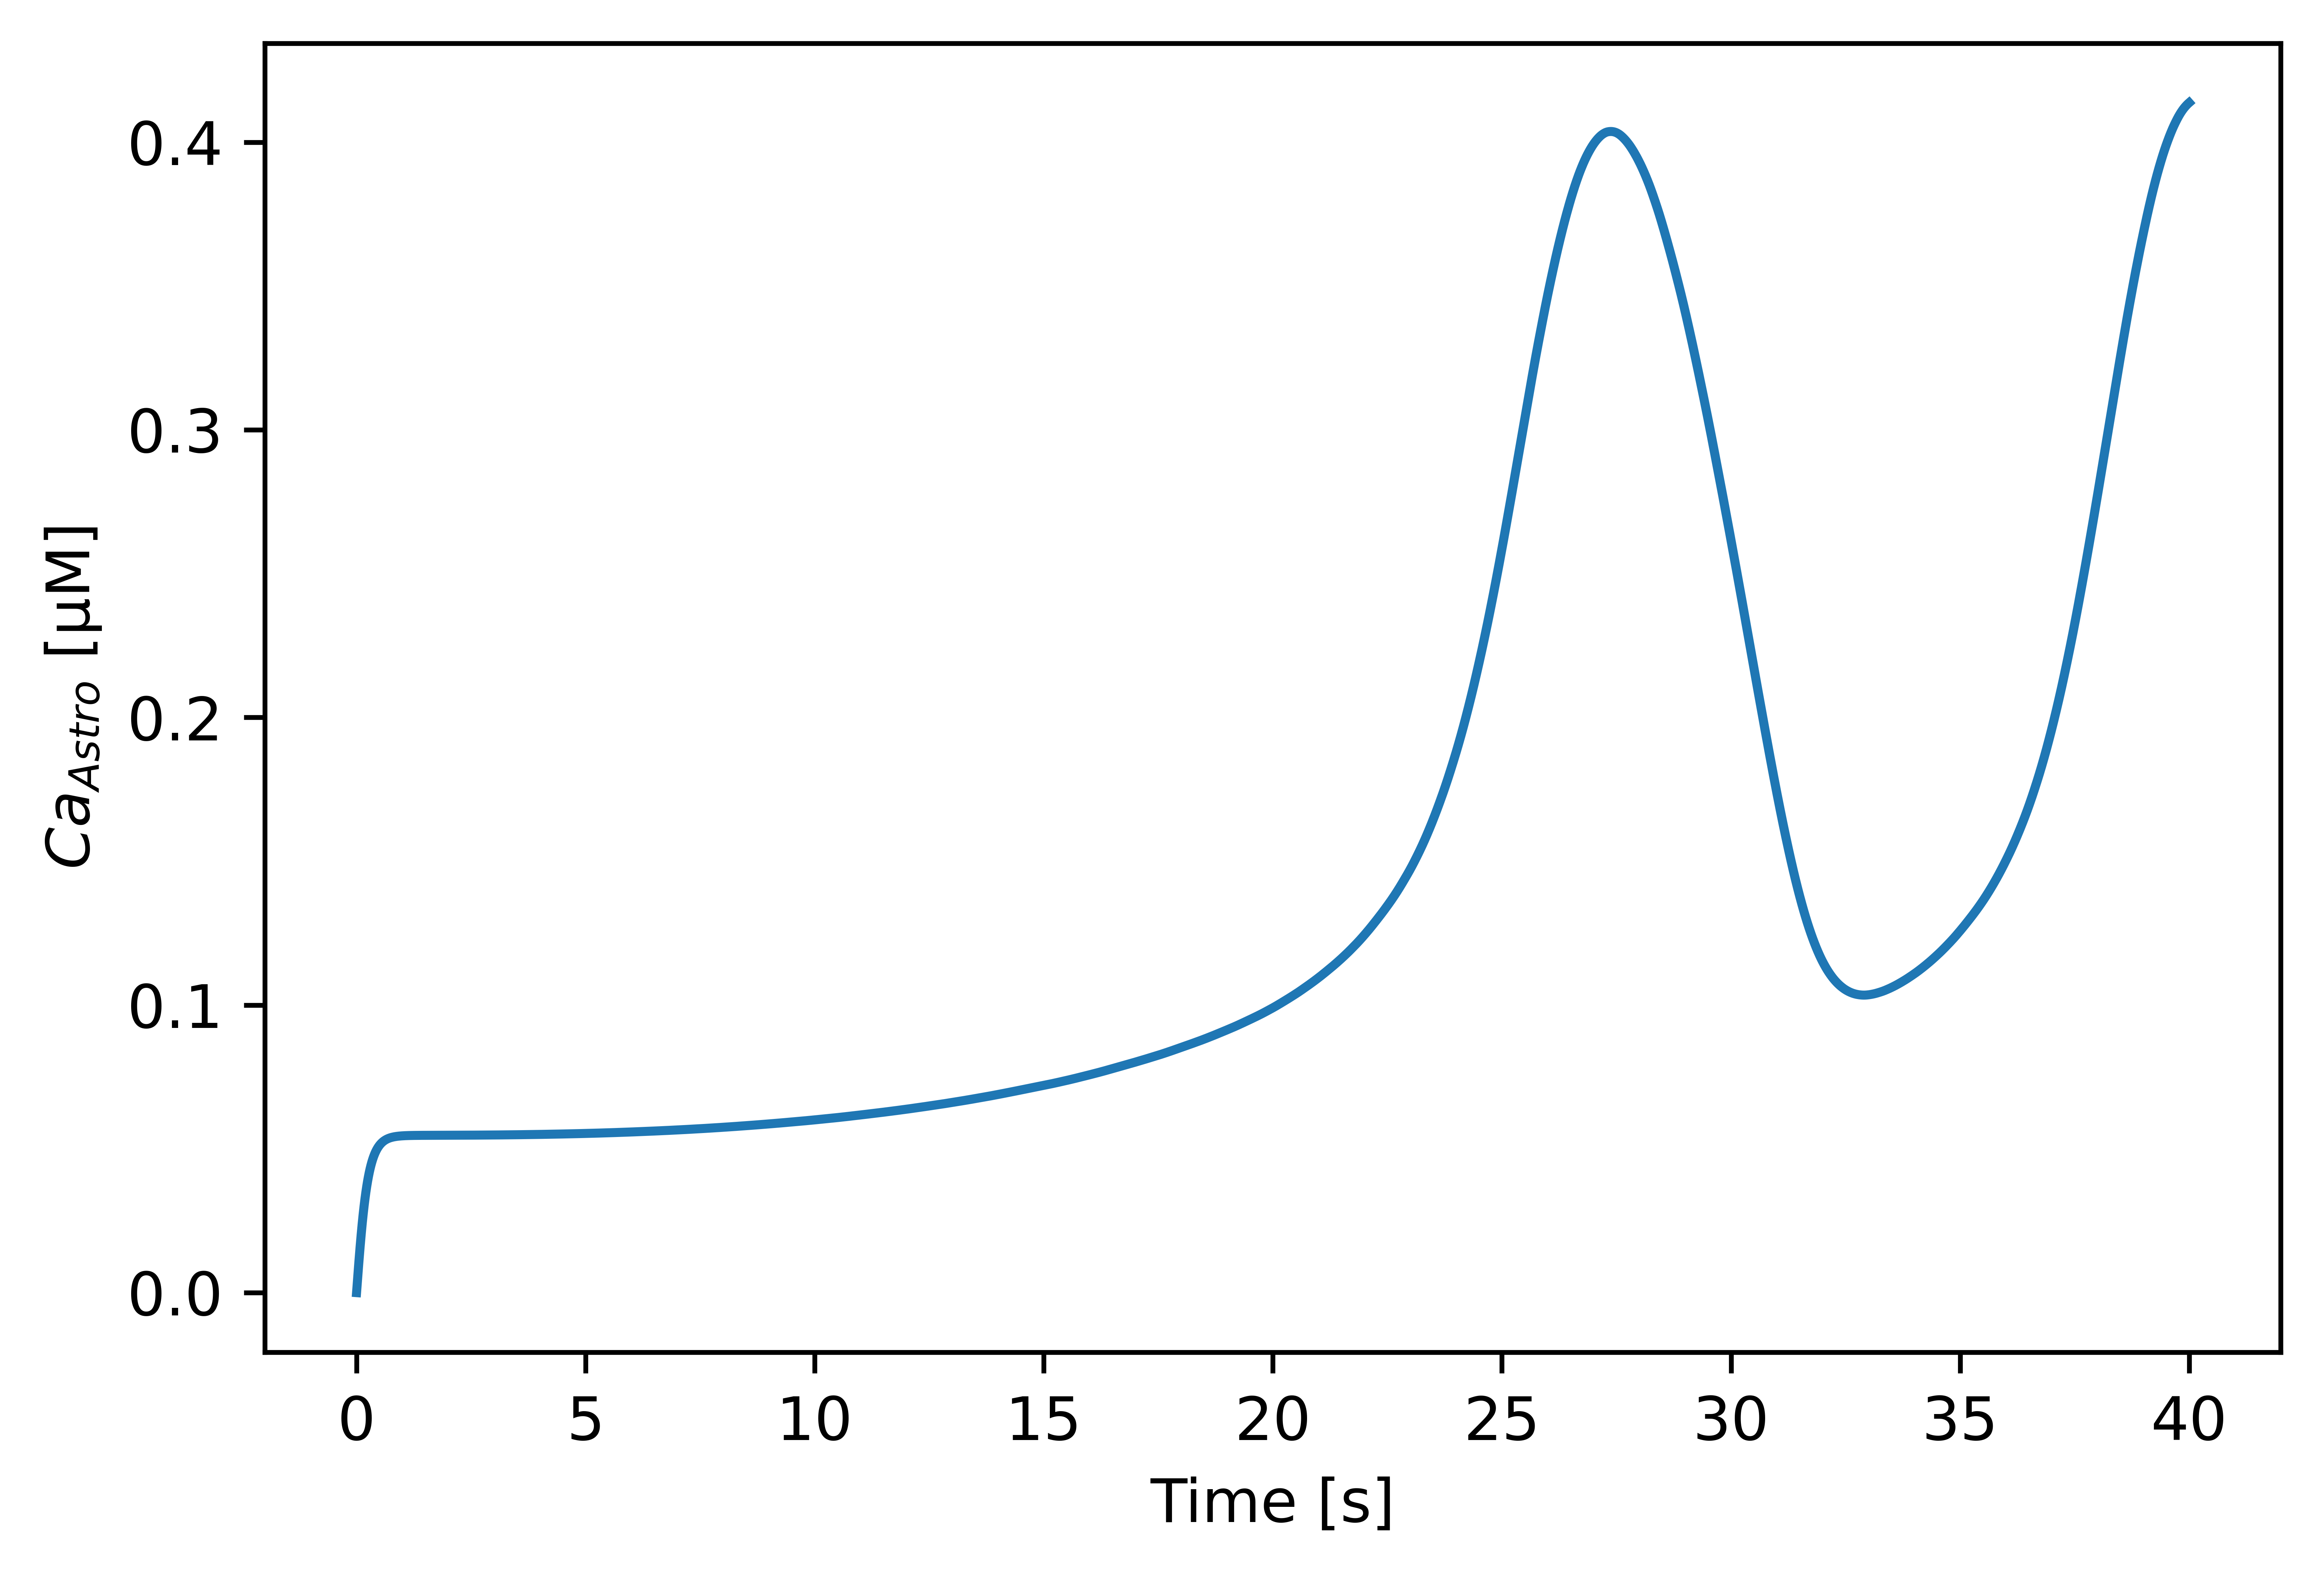

In [2]:
#Select a single plot to show

file_name = "risultati/"
file_name += "provaAstroVariables"
f1 = open(file_name+"parameters", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
time_axis = np.arange(0, parameters.simulation_time, parameters.time_step)
f2 = open(file_name+"values", "rb")
values = pickle.load(f2).Ca_Astro.value
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
fig, ax = plt.subplots(dpi=1200)
ax.plot(time_axis, values)#, markevery=100000)
#ax.legend()
ax.set_xlabel("Time [s]")
ax.set_ylabel("$Ca_{Astro}$ [μM]")
plt.savefig('risultati/eps_figures/Ca_Astro.eps', format='eps', bbox_inches = 'tight')